<a href="https://colab.research.google.com/github/cardiscardis/aiprojects/blob/main/nigeria_terror_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/globalterrorismdb_0522dist.xlsx")

In [ ]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
df= data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

# LET PERFORM EDA ON NIGERIA

In [ ]:
df_af = df[df['Country'].str.contains('Nigeria')]
df_af.head(100)

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
3593,1976,2,13,Nigeria,Lagos,Sub-Saharan Africa,Lagos,6.452331,3.419044,Assassination,3.0,1.0,4th Head of State: General Murtala Ramat Mohammed,02/13/1976: Assailants attacked General Murtal...,Coup plotters,Government (General),Firearms,NaN
10025,1980,1,17,Nigeria,Kaduna,Sub-Saharan Africa,Kaduna,10.530204,7.437338,Unknown,NaN,NaN,Consulate,NaN,Zimbabwe Patriotic Front,Government (Diplomatic),Unknown,NaN
20219,1983,11,11,Nigeria,Unknown,Sub-Saharan Africa,Unknown,NaN,NaN,Assassination,0.0,1.0,"Senator Girgiri Lawan, Senator of ruling Natio...",NaN,Unknown,Government (General),Unknown,NaN
20347,1983,11,27,Nigeria,Lagos,Sub-Saharan Africa,Lagos,6.618911,3.305532,Assassination,1.0,0.0,"Chief Joe Nkpang, Assistant general Manager",NaN,Gang,Government (General),Unknown,NaN
20359,1983,11,29,Nigeria,Lagos,Sub-Saharan Africa,Lagos,6.455641,3.429865,Assassination,0.0,1.0,"Chief Edwin Ume-Ezeoke, former speaker",NaN,Unknown,Government (General),Firearms,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74740,2002,11,2,Nigeria,Plateau,Sub-Saharan Africa,Namaran,9.103389,9.748799,Armed Assault,3.0,0.0,Nigerian government assistants on the return t...,"11/02/2002: Three people, including two member...",Unknown,Government (General),Melee,Unknown
74784,2002,11,15,Nigeria,Kwara,Sub-Saharan Africa,Ilorin,8.500509,4.551716,Bombing/Explosion,0.0,5.0,"National Pilot, a newspaper located in Ilorin",11/15/2002: A bomb exploded at the building ho...,Unknown,Journalists & Media,Explosives,"Specific motive is unknown; however, the owner..."
74866,2002,12,13,Nigeria,Plateau,Sub-Saharan Africa,Jos,9.933381,8.885243,Armed Assault,14.0,0.0,Indiscriminate civilians in their village in R...,"12/13/2002: Fulani nomads attacked Rim, a Jos ...",Fulani extremists,Private Citizens & Property,Firearms,Unknown
75101,2003,2,2,Nigeria,Lagos,Sub-Saharan Africa,Lagos,6.520917,3.379534,Bombing/Explosion,20.0,43.0,Nigerian Citizens at a street market on Idumag...,"02/02/2003: At around 11 am local time, a bomb...",Unknown,Private Citizens & Property,Explosives,Unknown


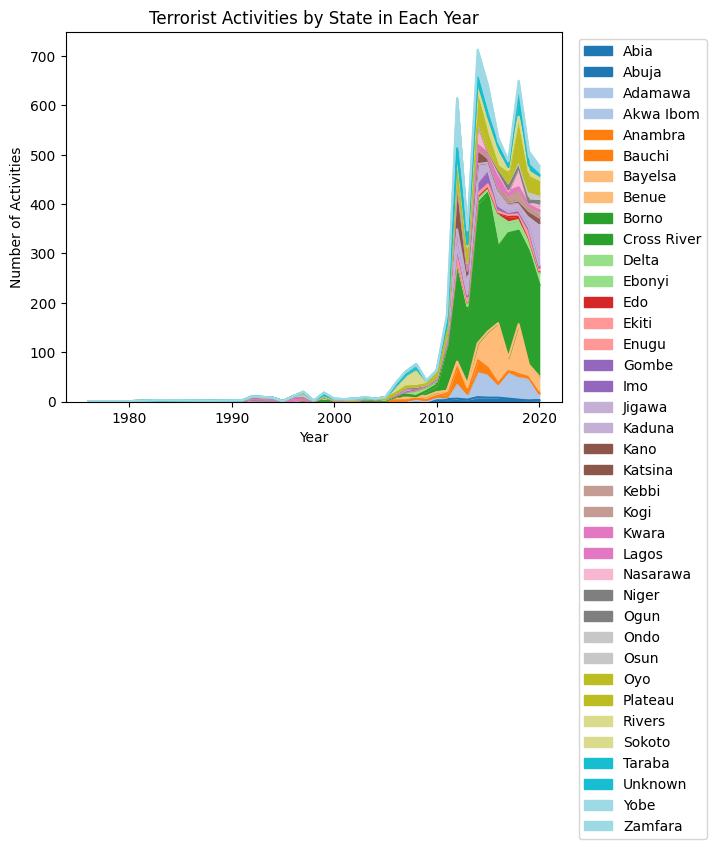

In [ ]:
grouped = df_af.groupby(['Year', 'state']).size().unstack()

# Create the area plot
grouped.plot(kind='area', stacked=True, colormap='tab20')

# Set the plot title and axis labels
plt.title('Terrorist Activities by State in Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Activities')

# Show the legend
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

# Display the plot
plt.show()

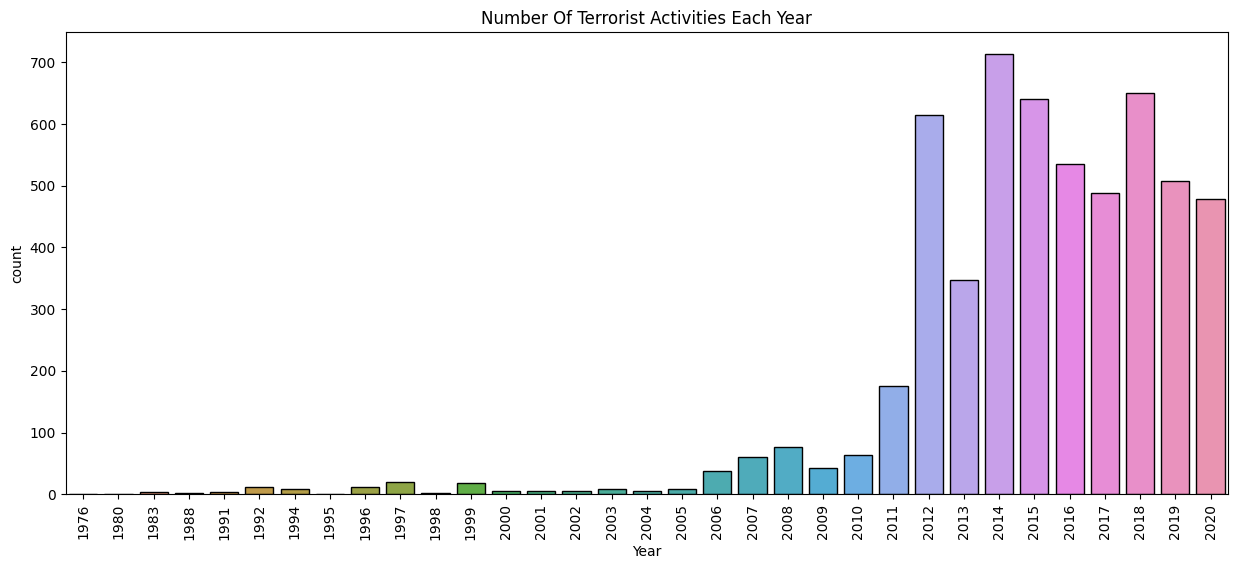

In [ ]:
custom_palette = ["#FF0000"]
plt.subplots(figsize=(15,6))
sns.countplot(x='Year', data=df_af,edgecolor='black')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

# from the graph above we can see that 2012, 2014 and 2015 has large number of terrorist attack

# since terrorist attack begin around 1976 in Nigeria we need to calcculate the number of attack, the increase between 1976-2017

In [ ]:
Year = df_af.Year.value_counts().to_dict()
rate =((Year[2017]-Year[1976])/Year[2017])*100
print(Year[1976],'attacks happened in 1970 &',Year[2017],'attacks happened in 2017')
print('So the number of attacks from 1970 has increased by',np.round(rate,0),'% till 2017')

1 attacks happened in 1970 & 488 attacks happened in 2017
So the number of attacks from 1970 has increased by 100.0 % till 2017


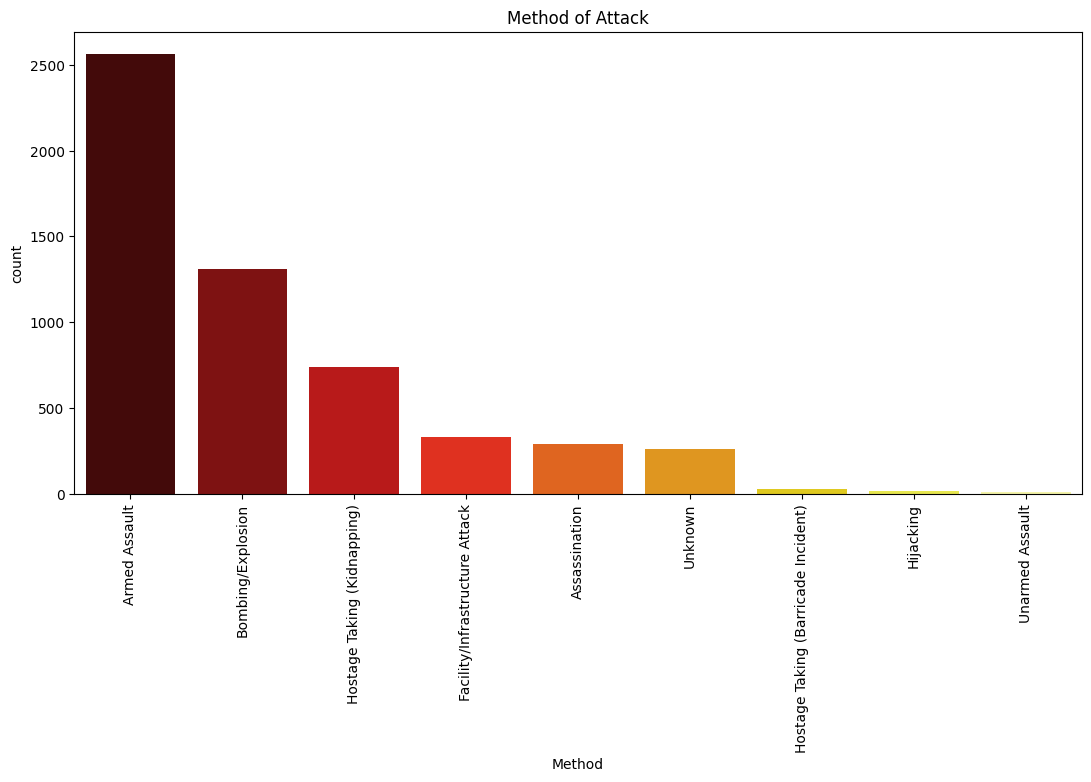

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(x=df_af['AttackType'],data=df_af, order=df_af['AttackType'].value_counts().index,
              palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

# from the above chart it is clear that Armed Assault method was mostly used follow by Bombing/Explosion

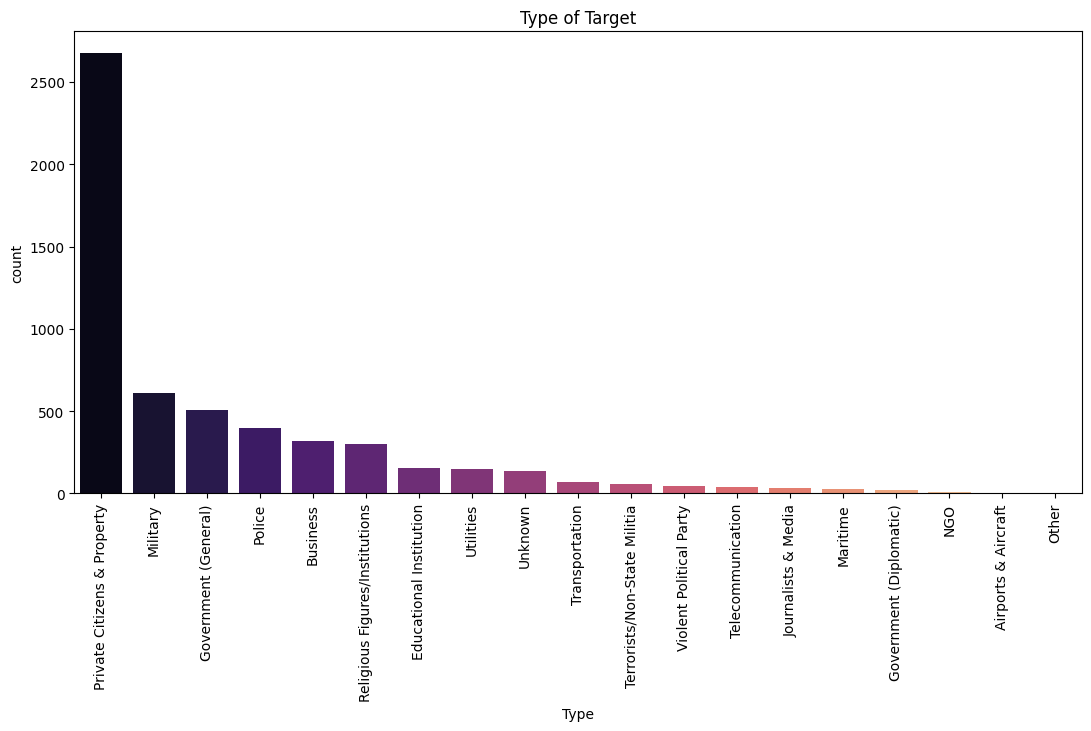

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(x=df_af['Target_type'], data=df_af,order=df_af['Target_type'].value_counts().index,
              palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Type of Target')
plt.show()

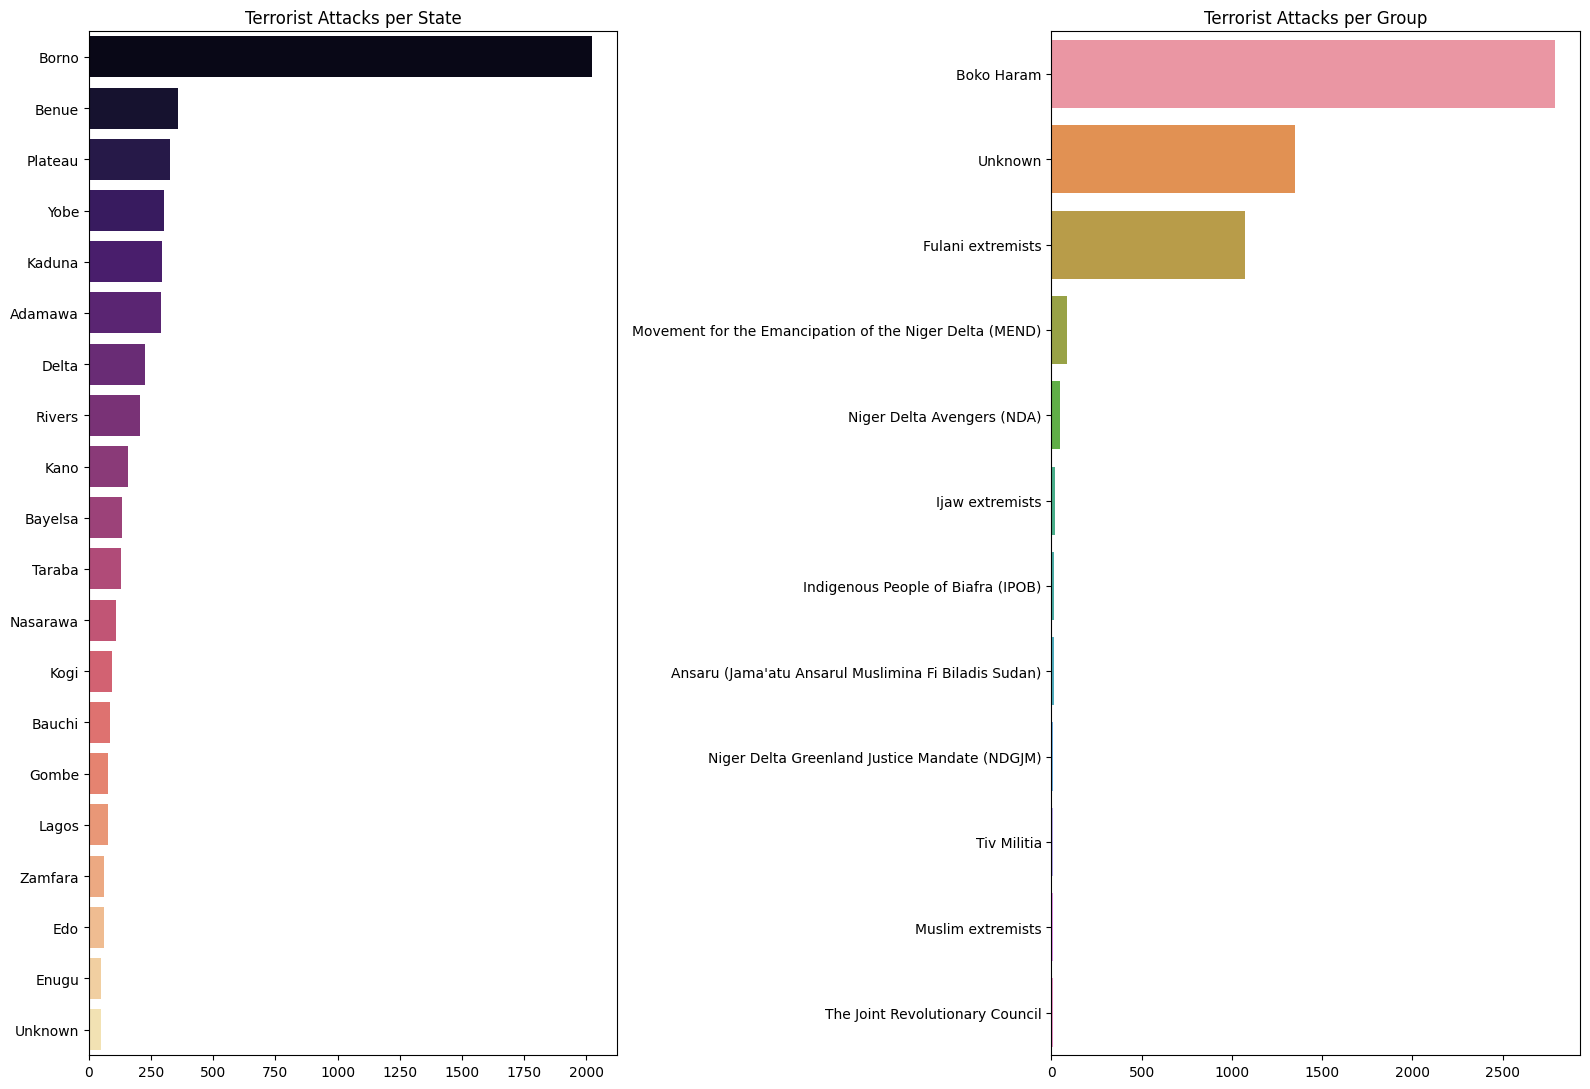

In [ ]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = df_af['state'].value_counts()[:20].values, y = df_af['state'].value_counts()[:20].index,
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per State')

sns.barplot(x=df_af['Group'].value_counts()[0:12].values,y=df_af['Group'].value_counts()[0:12].index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Group')
fig.tight_layout()
plt.show()


# from the above chart Borno has the highest number of terrorists attack per state and Boko Haram has the highest number of attacks per group

# Next is to move to cleaning and data preprocessing

# since motive and summary is not important for our modelling...Then we need to drop it

# Next thing to do is to fill the missing values(I used simpleimputer to fill the missing values)

In [ ]:
# let fill the nan values
df = df.drop(['Motive','Summary'], axis = 1)

In [ ]:
# let fill latitude and longitude with mean
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')
let_imputer = imputer.fit(df[['latitude','longitude']])
df[['latitude','longitude']] = let_imputer.transform(df[['latitude','longitude']])

In [ ]:
imputer_mod = SimpleImputer(missing_values = np.nan,
                        strategy ='most_frequent')
let_imputers = imputer_mod.fit(df[['Killed','Wounded']])
df[['Killed','Wounded']] = let_imputers.transform(df[['Killed','Wounded']])

# I turn my datatype(from object) to numerical

In [ ]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         209706 non-null  int64  
 1   Month        209706 non-null  int64  
 2   Day          209706 non-null  int64  
 3   Country      209706 non-null  int16  
 4   state        209706 non-null  int16  
 5   Region       209706 non-null  int8   
 6   city         209706 non-null  int32  
 7   latitude     209706 non-null  float64
 8   longitude    209706 non-null  float64
 9   AttackType   209706 non-null  int8   
 10  Killed       209706 non-null  float64
 11  Wounded      209706 non-null  float64
 12  Target       209706 non-null  int32  
 13  Group        209706 non-null  int16  
 14  Target_type  209706 non-null  int8   
 15  Weapon_type  209706 non-null  int8   
dtypes: float64(4), int16(3), int32(2), int64(3), int8(4)
memory usage: 14.8 MB


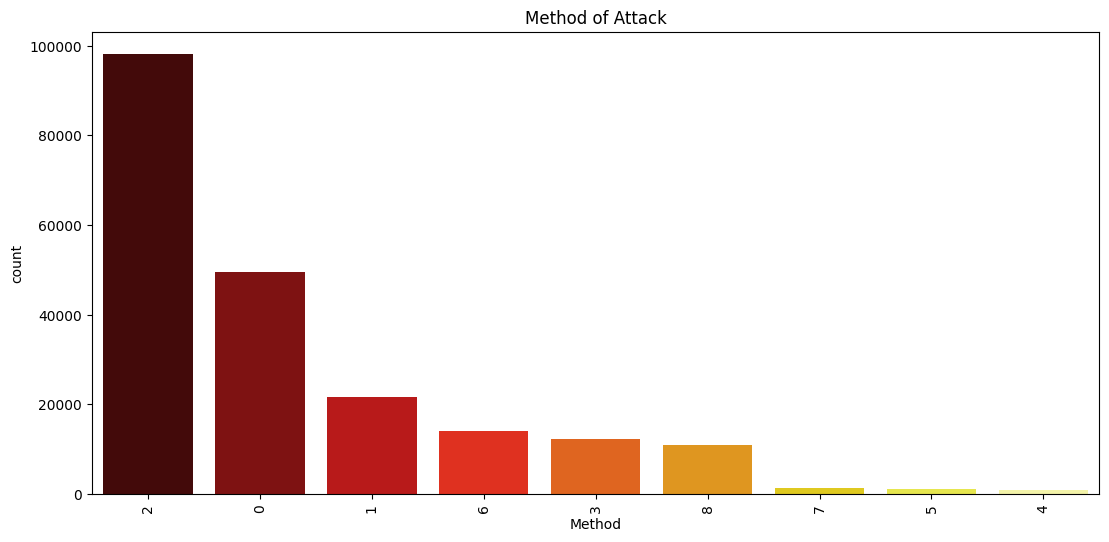

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns


plt.figure(figsize=(13,6))
sns.countplot(x=df['AttackType'], data=df, order=df['AttackType'].value_counts().index,
              palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

# Next is to split my dataset into features and target(where 'AttackType' is the target i.e dependent variable and other columns
# is the features i.e independent variable)

In [ ]:
X = df.drop(['AttackType','Year', 'Month', 'Day'], axis= 1).to_numpy()
y = df['AttackType'].to_numpy()

In [ ]:
num_classes = np.max(y) + 1
num_classes

9

In [ ]:


# Convert labels to categorical (one-hot) encoding
X.shape, y.shape

((209706, 12), (209706,))

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((167764, 12), (41942, 12), (167764,), (41942,))

In [ ]:
# let import necessary library
from keras.models import Sequential
from keras.layers import Input, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Flatten, Dropout, LSTM
from tensorflow.keras.models import Model
from keras.optimizers import SGD

In [ ]:
input_train = np.expand_dims(X_train, axis=1)
input_val = np.expand_dims(X_val, axis=1)
input_train.shape, input_val.shape

((167764, 1, 12), (41942, 1, 12))

In [ ]:
series_input = Input(shape = (X_train.shape[1],1,))

In [ ]:
# 1. Create a model
model_1 = Sequential()


# Add layers to the model
model_1.add(Conv1D(64, 8, activation='relu', input_shape=(input_train.shape[1:]), padding='same'))
model_1.add(MaxPooling1D(32, padding='same'))
model_1.add(Conv1D(64, 8, activation='relu', padding='same'))
model_1.add(MaxPooling1D(2, padding='same'))
model_1.add(Dropout(0.5))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(32, activation='relu'))
model_1.add(Flatten())
model_1.add(Dense(num_classes, activation='softmax'))

model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 64)             6208      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 64)             32832     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 dense (Dense)               (None, 1, 128)            8

In [ ]:
# 3. Fit the model
model_1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model = model_1.fit(input_train,y_train,
    validation_data=(input_val, y_val),
    epochs= 100,
    batch_size= 100)

Epoch 1/100
1678/1678 [==============================] - 11s 5ms/step - loss: 0.8404 - accuracy: 0.7330 - val_loss: 0.6826 - val_accuracy: 0.7723
Epoch 2/100
1678/1678 [==============================] - 10s 6ms/step - loss: 0.7018 - accuracy: 0.7694 - val_loss: 0.6467 - val_accuracy: 0.7878
Epoch 3/100
1678/1678 [==============================] - 8s 5ms/step - loss: 0.6716 - accuracy: 0.7786 - val_loss: 0.6184 - val_accuracy: 0.7942
Epoch 4/100
1678/1678 [==============================] - 9s 5ms/step - loss: 0.6515 - accuracy: 0.7857 - val_loss: 0.6124 - val_accuracy: 0.7970
Epoch 5/100
1678/1678 [==============================] - 9s 5ms/step - loss: 0.6394 - accuracy: 0.7899 - val_loss: 0.6007 - val_accuracy: 0.8005
Epoch 6/100
1678/1678 [==============================] - 8s 5ms/step - loss: 0.6297 - accuracy: 0.7929 - val_loss: 0.5983 - val_accuracy: 0.8047
Epoch 7/100
1678/1678 [==============================] - 9s 6ms/step - loss: 0.6228 - accuracy: 0.7947 - val_loss: 0.5854 - val_

In [ ]:
# Get the accuracy values from the training history
train_accuracyCNN = cnn_model.history['accuracy']
val_accuracyCNN = cnn_model.history['val_accuracy']

# Plot the accuracy graph
epochs = range(1, len(train_accuracyCNN) + 1)
plt.plot(epochs, train_accuracyCNN, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracyCNN, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
train_accuracyCNN[-1]

In [ ]:
y_pred_cnn = model_1.predict(input_val)
y_pred_cnn = np.argmax(y_pred_cnn,axis=1)
print(classification_report(y_val, y_pred_cnn))

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred_cnn)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8], yticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_val)

log_score=logreg.score(X_train,y_train)
log_score

In [ ]:
print(classification_report(y_val, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8], yticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
# y_pred_rf = rf.predict(xtest)

rf_score=rf.score(X_train,y_train)
rf_score

In [ ]:
y_pred_rf = rf.predict(X_val)
print(classification_report(y_val, y_pred_rf))

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8], yticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 1. Create an ANN model
model_3 = tf.keras.Sequential([
           tf.keras.layers.Dense(9, activation='relu'),
           tf.keras.layers.Dense(15, activation='relu'),
           tf.keras.layers.Dense(50, activation='relu'),
           tf.keras.layers.Dense(num_classes, activation='softmax')
])



# 2. Comile the model
model_3.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=['accuracy'])


In [ ]:
# 3. Fit the model
history = model_3.fit(X_train,
                      tf.one_hot(y_train, depth=num_classes),
                      epochs=250,
                      verbose = 1,
                      validation_data=(X_val, tf.one_hot(y_val, depth= num_classes))
                    )

Epoch 1/250
5243/5243 [==============================] - 13s 2ms/step - loss: 1.2437 - accuracy: 0.5758 - val_loss: 0.8881 - val_accuracy: 0.7275
Epoch 2/250
5243/5243 [==============================] - 11s 2ms/step - loss: 0.8401 - accuracy: 0.7394 - val_loss: 0.7935 - val_accuracy: 0.7511
Epoch 3/250
5243/5243 [==============================] - 11s 2ms/step - loss: 0.7817 - accuracy: 0.7541 - val_loss: 0.7544 - val_accuracy: 0.7655
Epoch 4/250
5243/5243 [==============================] - 11s 2ms/step - loss: 0.7498 - accuracy: 0.7626 - val_loss: 0.7290 - val_accuracy: 0.7691
Epoch 5/250
5243/5243 [==============================] - 11s 2ms/step - loss: 0.7284 - accuracy: 0.7662 - val_loss: 0.7132 - val_accuracy: 0.7722
Epoch 6/250
5243/5243 [==============================] - 11s 2ms/step - loss: 0.7151 - accuracy: 0.7684 - val_loss: 0.7038 - val_accuracy: 0.7740
Epoch 7/250
5243/5243 [==============================] - 11s 2ms/step - loss: 0.7065 - accuracy: 0.7693 - val_loss: 0.6970 -

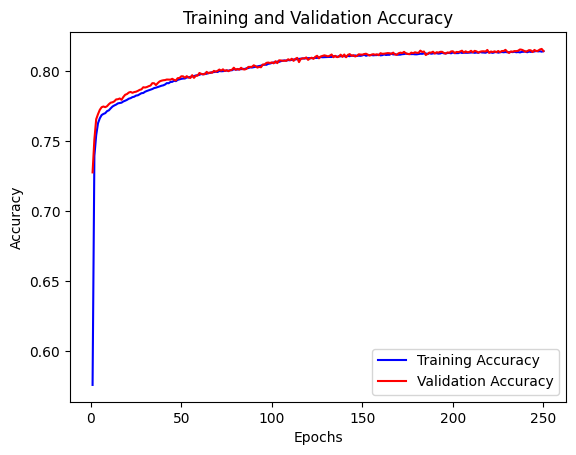

In [ ]:
# Get the accuracy values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy graph
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
train_accuracy[-1]

0.814042329788208

1311/1311 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.74      0.79      0.76     10056
           1       0.61      0.45      0.52      4200
           2       0.93      0.99      0.96     19654
           3       0.78      0.78      0.78      2419
           4       0.00      0.00      0.00       158
           5       0.00      0.00      0.00       237
           6       0.53      0.43      0.48      2787
           7       0.55      0.44      0.49       257
           8       0.73      0.78      0.75      2174

    accuracy                           0.81     41942
   macro avg       0.54      0.52      0.53     41942
weighted avg       0.80      0.81      0.80     41942



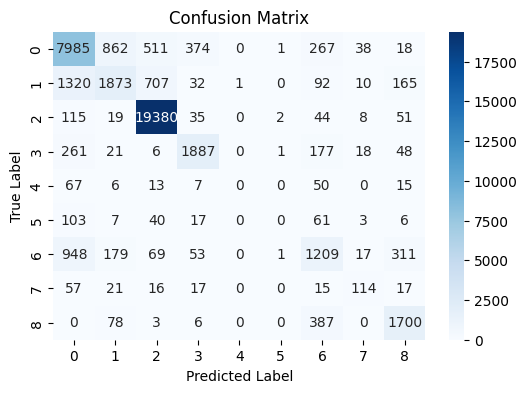

In [ ]:
y_pred_ann = model_3.predict(X_val)
y_pred_ann = np.argmax(y_pred_ann,axis=1)
print(classification_report(y_val, y_pred_ann))

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred_ann)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8], yticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from keras.utils import to_categorical

# LSTM Model

y_train = to_categorical(y_train, num_classes=9)
print('shape of y_train: ', y_train.shape)

y_val = to_categorical(y_val, num_classes=9)
print('shape of y_val: ', y_val.shape)

X_train_lstm = X_train.reshape(X_train.shape[0],-1,1)
print('shape of X_train_lstm: ', X_train_lstm.shape[1:])

# test_x = test.iloc[:,:].values
X_val_lstm = X_val.reshape(X_val.shape[0],-1,1)
print('shape of X_val_lstm: ', X_val_lstm.shape[1:])

batch_size = 2
epoch = 50
hidden_units = 64

model = Sequential()
model.add(LSTM(hidden_units,  batch_size=batch_size, input_shape=(X_train_lstm.shape[1:])))
model.add(Dense(9, activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy' ])
model.fit(X_train_lstm, y_train, batch_size=batch_size, epochs=epoch, verbose=1)




shape of y_train:  (167764, 9)
shape of y_val:  (41942, 9)
shape of X_train_lstm:  (12, 1)
shape of X_val_lstm:  (12, 1)
Epoch 1/50
83882/83882 [==============================] - 425s 5ms/step - loss: 0.6540 - accuracy: 0.7864
Epoch 2/50
83882/83882 [==============================] - 435s 5ms/step - loss: 0.5544 - accuracy: 0.8143
Epoch 3/50
83882/83882 [==============================] - 409s 5ms/step - loss: 0.5288 - accuracy: 0.8230
Epoch 4/50
83882/83882 [==============================] - 462s 6ms/step - loss: 0.5145 - accuracy: 0.8265
Epoch 5/50
83882/83882 [==============================] - 423s 5ms/step - loss: 0.5039 - accuracy: 0.8297
Epoch 6/50
83882/83882 [==============================] - 428s 5ms/step - loss: 0.4942 - accuracy: 0.8329
Epoch 7/50
28411/83882 [=========>....................] - ETA: 4:41 - loss: 0.4825 - accuracy: 0.8358

In [ ]:
scores = model.evaluate(X_test, y_test, batch_size=batch_size)
predictions = model.predict(X_test, batch_size = batch_size)


In [ ]:
print('LSTM test accuracy:', scores[1])
pred_labels = np.argmax(predictions, axis=1)
pred_labels[:50]

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)

print(classification_report(y_test_2, pred_labels))

# Compute the confusion matrix
cm = confusion_matrix(y_test_2, pred_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8], yticklabels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
models = pd.DataFrame({
    'Model': [
              'Random Forest',
              'Logistic Regression',
              "ANN",
              "CNN"],
    'Training Accuracy': [
              rf_score,
              log_score,
              train_accuracy[-1],
              train_accuracyCNN[-1]],
    'Validation Accuracy': [
        '-', '-', val_accuracy[-1], val_accuracyCNN[-1]
    ]})
models.sort_values(by='Score', ascending=False)

In [ ]:
#from joblib import dump


# let save the model

In [ ]:
# import load_model
# model_1.save('cnnmodel.h5')
# dump(logreg, 'logreg_model.joblib')
# dump(rf, 'rf_model.joblib')